In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,auc,roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Practical Exam Datasets/Decision Tree & Naive Bayes Classification/Social_Network_Ads.csv')

In [3]:
df.shape

(400, 5)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
X=df[['Gender','Age','EstimatedSalary']]
Y=df['Purchased']

In [9]:
# Convert categorical variable 'Gender' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [10]:
model=GaussianNB()

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=15)

In [12]:
# Feature scaling (important for Naive Bayes)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
model.fit(X_train,Y_train)

GaussianNB()

In [14]:
Y_pred=model.predict(X_test)

In [15]:
accuracy=accuracy_score(Y_test,Y_pred)
cm=confusion_matrix(Y_test,Y_pred)
cr=classification_report(Y_test,Y_pred)

In [16]:
print(f'Accuracy : {accuracy}')
print('Confusion Matrix')
print(cm)
print(cr)

Accuracy : 0.88
Confusion Matrix
[[59  3]
 [ 9 29]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        62
           1       0.91      0.76      0.83        38

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100



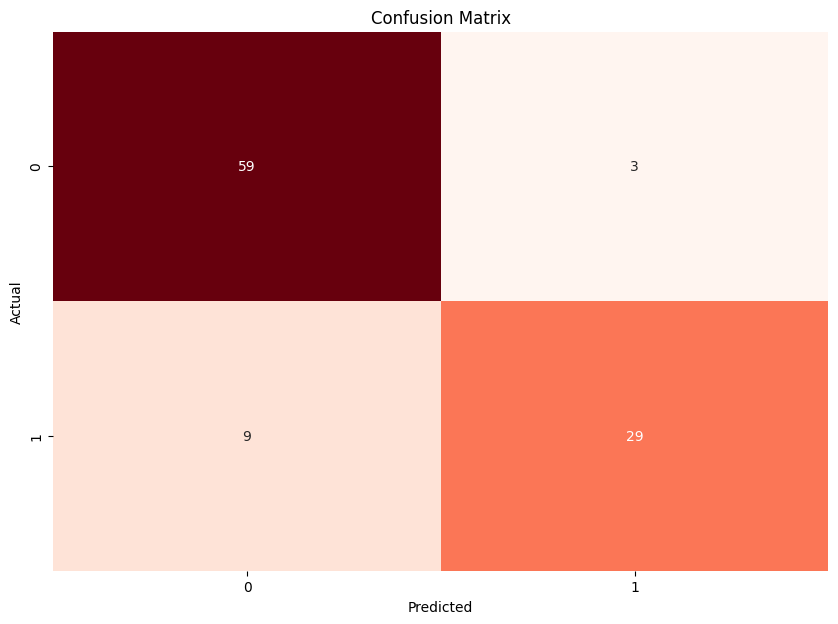

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap="Reds",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
Y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_prob)
auc_roc=auc(fpr,tpr)

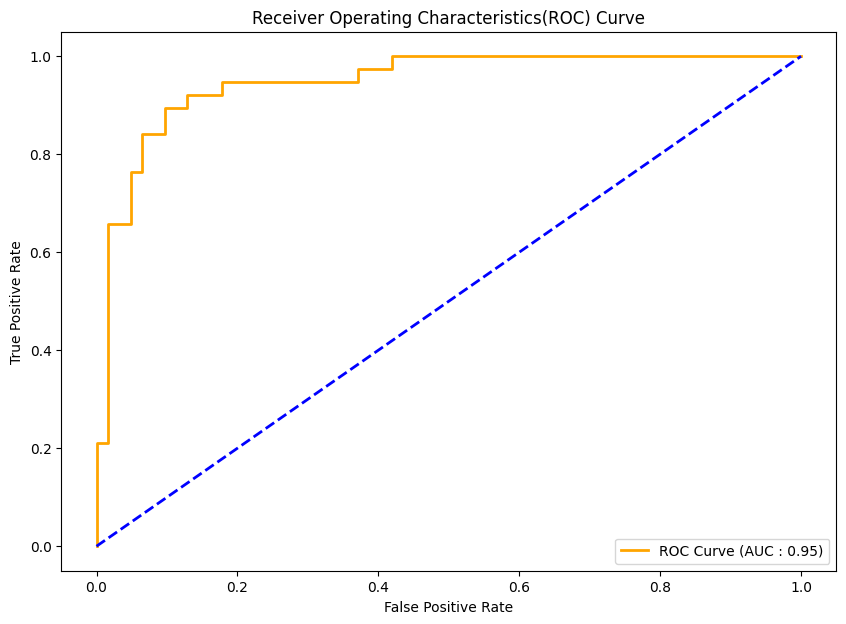

In [19]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,color="Orange",lw=2,label=f'ROC Curve (AUC : {auc_roc:.2f})')
plt.plot([0,1],[0,1],color="Blue",lw=2,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics(ROC) Curve")
plt.legend(loc="lower right")
plt.show()